# Проект 4: Исследование продаж компьютерных игр

### Данные для проекта:

   Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
  Сейчас декабрь 2016 года и идёт планирование рекламной кампании интернет-магазина «Стримчик» на 2017-й год. 
  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
  
Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


### Цель проекта:

#### Выявить закономерности, определяющие успешность игры;

#### Выявить потенциально популярный продукт для планирования рекламных кампании интернет-магазина «Стримчик»;

#### Отработать принцип работы с подобными данными. 

### План проекта:

1. Провести обзор данных и подготовить данные для исследования;
2. Провести исследовательский анализ данных:
- Изучить сколько игр выпускалось в разные годы. Сделать вывод - важны ли данные за все периоды?
- Изучить изменение продаж по платформам: отобрать платформы с наибольшими суммарными продажами и построить распределение по годам. Сделать вывод - за какой характерный срок появляются новые и исчезают старые платформы?
- Изучить данные за соответствующий актуальный период, которые помогут построить прогноз по продажам на 2017 год.
- Изучить какие платформы лидируют по продажам, какие растут, а какие падают. Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Изучить общее распределение игр по жанрам. Сделать выводы о самых прибыльных жанрах и о жанрах с высокими и низкими продажами.
3. Составить портрет пользователя каждого региона  (NA, EU, JP), определив:
- Самые популярные платформы (топ-5). Описать различия
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияние рейтинга ESRB на продажи в отдельном регионе.

4. Написать общий вывод по проекту.


### Обзор данных

Импортируем необходимые библиотеки для работы с данными:

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


Считываем файл с разрешением .csv, применяем разделение столбцов знаком ',':

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10) 
#для вывода первых 10 строк таблицы используем метод head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получаем обобщенную информацию о таблице:

In [4]:
data.info()
#для получения информации используем метод info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для просмотра параметров исходных данных строим гистограммы для всех столбцов таблицы с данными:

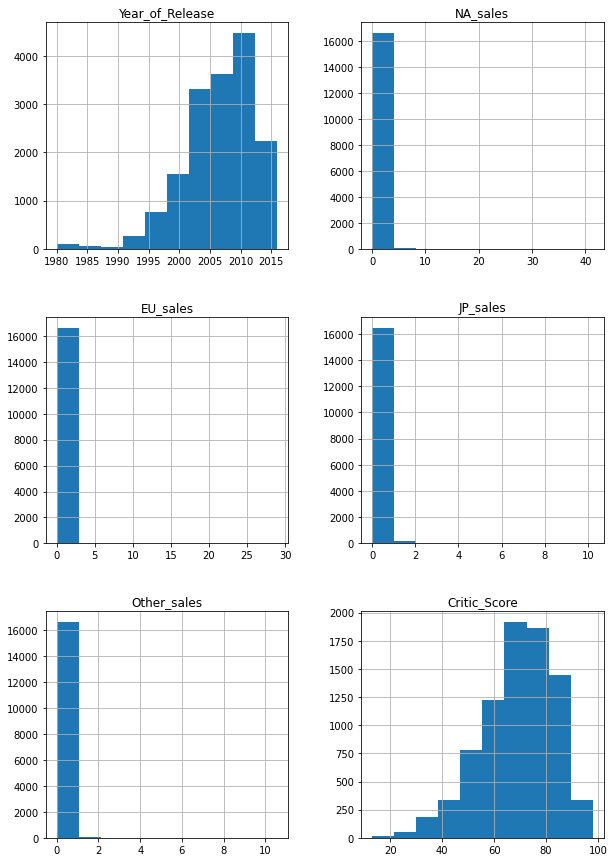

In [5]:
data.hist(figsize=(10,15));
#для построения гистограмм используем метод hist()

Вывод: таблица состоит из 16715 строк и 11 столбцов. В столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропуски значений.

### Предобработка данных

#### Cтиль заголовков

Просмотрим и отредактируем названия столбцов таблицы в соответсвии со "змеиным" регистром:

In [6]:
data.columns
#просмотрим названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Изменим заглавные буквы на строчные и проверим полученный результат:

In [7]:
data = data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
#для изменения названия столбцов используем метод rename()

In [8]:
data.columns
#просмотрим повторно измененные названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Пропуски значений

Просмотрим количество пропусков значений по каждому столбцу:

In [9]:
data.isnull().sum().sort_values(ascending = False)
#для просмотра и суммирования пропусков используем методы isnull() и sum(), для их сортировки используем метод sort_values()

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Вывод: в столбцах year_of_release, name и genre количество пропусков не критичное для анализа (менее 2 % данных)- удалим эти строки:

In [10]:
data = data.dropna(subset = ['year_of_release', 'name', 'genre'])
#для удаления строк с пропусками используем метод dropna()

In [11]:
data.isnull().sum().sort_values(ascending = False)
#повторно проверим пропуски

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Посмотрим на уникальные значения оставшихся трёх столбцов (critic_score, rating, user_score) с пропусками:

In [12]:
data['critic_score'].unique()
#для просмотра уникальных значений используем метод unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
data['user_score'].unique()
#для просмотра уникальных значений используем метод unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значение 'tbd' на NaN в столбце user_score для дальнейшей работы как с численными данными:

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
#для замены значений используем метод replace()
data['user_score'].unique()
#для просмотра уникальных значений используем метод unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заменим пропуски в столбце rating на 'undefined' для дальнейшей работы как с качественными данными (тип object):

In [15]:
data['rating'] = data['rating'].fillna('undefined')
#для замены пропусков значений используем метод fillna()
data['rating'].unique()
#для просмотра уникальных значений используем метод unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [16]:
data.isnull().sum().sort_values(ascending = False)
#повторно проверим пропуски

user_score         8981
critic_score       8461
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

Вывод: пропуски в столбцах year_of_release, name и genre удалены, в  столбце user_score значения 'tbd' заменены на 'NaN' значения, в столбце rating пропуски пока не трогаем.

#### Изменение типов данных

Заменим типы данных в тех столбац в которых можем:
- в столбце year_of_release тип данных float меняем на int, так как год - целое число;
- в столбце user_score тип данных object меняем на float, так как теперь все значения в столбце - числа или пустые строки;



In [17]:
data['year_of_release'] = data['year_of_release'].astype('int')
#для замены типа данных используем метод astype()

In [18]:
data['user_score'] = data['user_score'].astype('float64')
#для замены типа данных используем метод astype()

In [19]:
data.info()
#используем метод info() для проверки изменения типа данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Вывод: типы данных в столбцах year_of_release и user_score изменены.

#### Устранение дубликатов значений

Выведем информацию о явных дубликатах и при необходмости удалим их:

In [20]:
data.duplicated().sum()
#для выводы информации о явных дубликатах используем методы duplicated() и sum()

0

Вывод: явных дубликатов нет, посмотрим на неявные дубликаты:

In [21]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Вывод: в таблице нет явных дубликатов и есть один неявный дубликат, соответсвенно нет влияния дубликатов на аналитику в данном DataFrame.

####  Устранение редких и выбивающихся значений (аномалии) во всех столбцах

Посмотрим общую информацию об анамалиях

In [22]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Добавим новый столбец с суммарными продажами:

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


Основные выводы по предобработке данных:
- изменены заглавные буквы на строчные в названиях столбцов;
- в столбцах year_of_release, name и genre удалено не критичное количество пропусков (менее 2 % от всех данных);
- пропуски значений в стобце 'rating' заменены на 'undefined';
- значение 'tbd' в столбце user_score заменено на 'NaN';
- в таблице нет явных дубликатов и есть один неявный дубликат, влияния дубликатов на аналитику в данном DataFrame нет;
- устранение анамалий на данном этапе решено не проводить, возможно выбросы нужно будет удалить в дальнейшем.


### Проведем исследовательский анализ данных

#### Изучим сколько игр выпускалось в разные годы. 

Оценим количество игр выпущенных в разные годы, построив гистограмму:

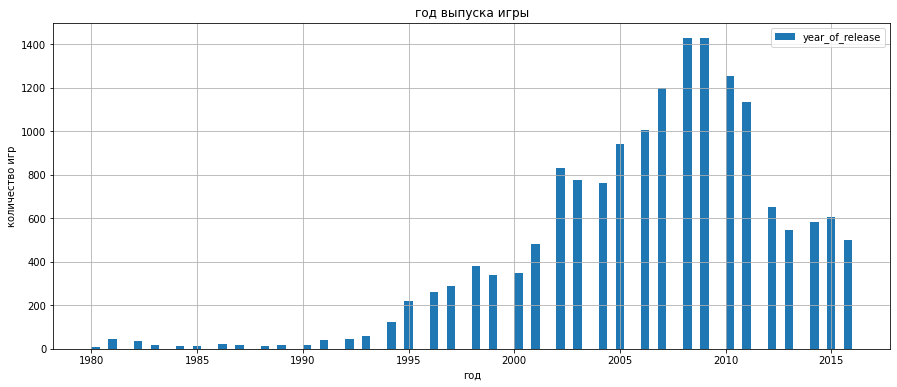

In [24]:
data['year_of_release'].hist(bins = 90, figsize = (15,6), range = (1980, 2016), legend=True);
plt.title('год выпуска игры')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()
#построим гисторамму методом hist()

Вывод: на гистограмме распределения выпуска игр видно,что объём выпускаемых платформенных игр начал активный рост с 1993 года и продолжил в 2001 году, пик роста пришёлся на 2008-2009 годы, после чего начался спад в объёмах выпускаемых платформенных игр.

Можно предположить, что спад в объёме выпускаемых платформенных игр пришёлся на активных рост объёма в выпуске игр для мобильных устройств и использования данных устройств в том числе для игр.

Всего представлен временной период с 1980 по 2016 год. 

In [25]:
len(data.query('year_of_release < 1993'))
#сделаем срез методом query() и посчитаем количество игр методом len() выпущенных до 1993 года

305

In [26]:
len(data.query('year_of_release < 2000'))
#сделаем срез методом query() и посчитаем количество игр методом len() выпущенных до 2000  года

1974

In [27]:
len(data.query('year_of_release >= 1993'))
#сделаем срез методом query() и посчитаем количество игр методом len() выпущенных после 1993 года

16139

In [28]:
len(data.query('year_of_release >= 2000'))
#сделаем срез методом query() и посчитаем количество игр методом len() выпущенных после 1993 года

14470

In [29]:
volume_2000 = len(data.query('year_of_release < 2000'))/len(data.query('year_of_release >= 2000'))*100
round(volume_2000, 2)

13.64

Выводы: 
- за 12 лет с 1980 по 1993 год было выпущено всего 305 игр, при этом за следующие 23 года с 1993 по 2016 год - 16139 игр;
- за 20 лет с 1980 по 2000 год было выпущено всего 1974 игр, при этом за следующие 16 лет с 2000 по 2016 год - 14470 игр;
- наибольшее количество игр было выпущено в 2009 и 2008 годах. 


В связи с тем, что до 2000 года было выпущено всего 13.6 % игр от общего исследуемого объёма выберем период с 2001 по 2016 гг.

In [30]:
data_year_2000 = data.query('~(year_of_release < 2000)')
#все значения года меньше 2000 года - выбросы, удаляем их сделав срез
len(data.query('year_of_release >= 2000'))

14470

#### Изучим изменение продаж по платформам: отберём платформы с наибольшими суммарными продажами и построим распределение по годам.

Посмотрим на уникальные значения столбца platform:

In [31]:
data_year_2000['platform'].unique()
#для просмотра используем метод unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

Найдём ТОП-5 платформ с наиболее высокими суммарными продажами после 2000 года:

In [32]:
data_top5_platform = data_year_2000.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
data_top5_platform
#для поиска используем сводную таблицу pivot_table()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


ТОП - 5 платформ начиная с 2000 года по суммарным продажам являются PS2, X360, PS3, Wii, DS, сделаем срез по ним и построим распределение по годам:

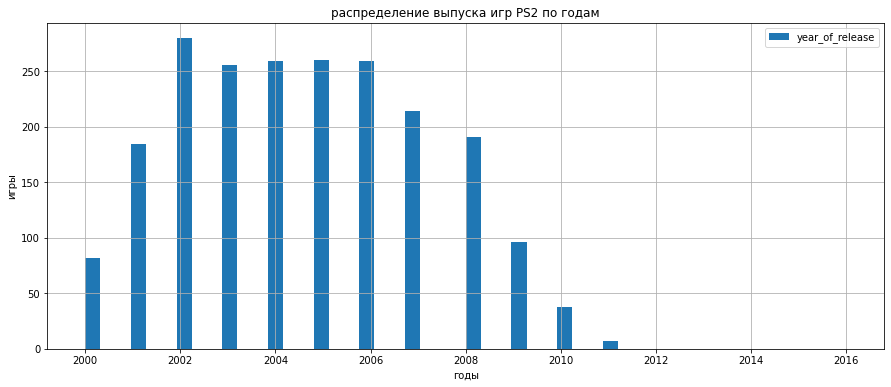

In [33]:
data_year_2000.query('platform == "PS2"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PS2 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()


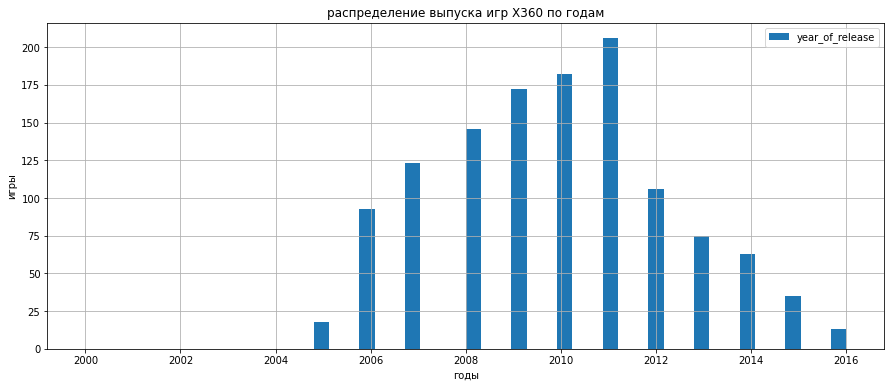

In [34]:
data_year_2000.query('platform == "X360"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр X360 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

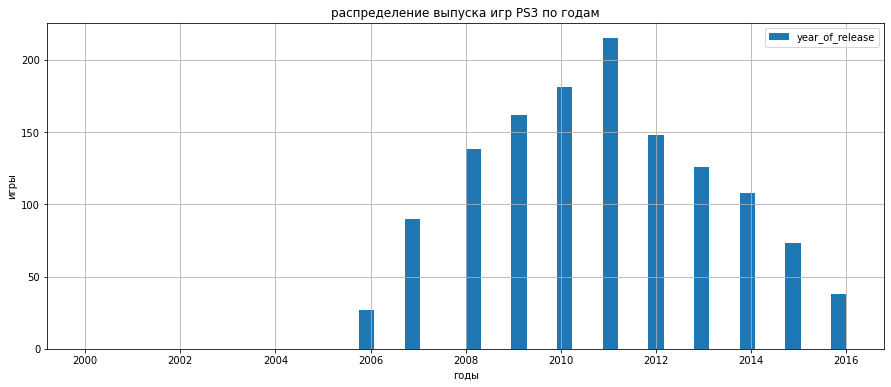

In [35]:
data_year_2000.query('platform == "PS3"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PS3 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

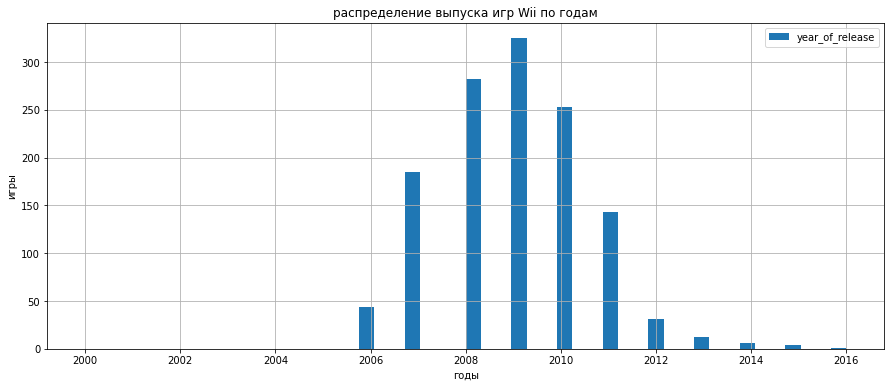

In [36]:
data_year_2000.query('platform == "Wii"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр Wii по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

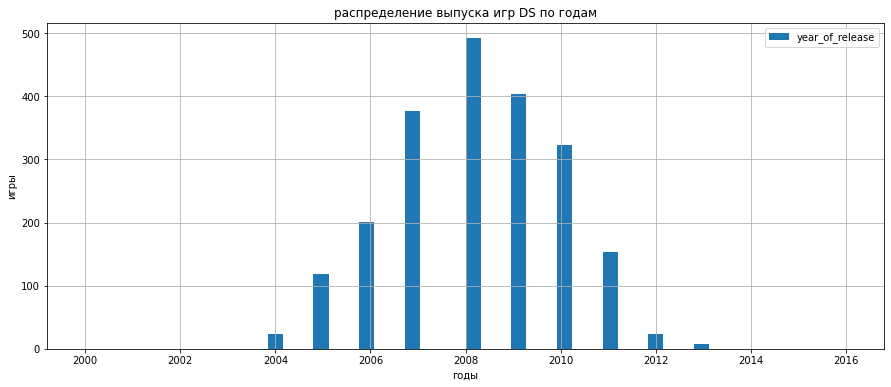

In [37]:
data_year_2000.query('platform == "DS"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр DS по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

Вывод: срок жизни платформы составляет примерно 10 лет

#### Изучим данные за период, который поможет построить прогноз по продажам на 2017 год, изучим какие платформы лидируют по продажам, какие растут, а какие падают. Выберем несколько потенциально прибыльных платформ.

Сделаем срез по актуальному периоду (возьмём данные за последние 3 года как наиболее актуальные) и посмотрим на существующие платформы и их объёмы:

In [38]:
data_year_2014 = data.query('~(year_of_release < 2014)')
data_year_2014
#для среза используем метод query()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [39]:
top_relevant_platform = data_year_2014.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(20)
top_relevant_platform
#для свода используем сводную таблицу pivot_table()

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


ТОП - 10 платформ начиная с 2014 года по суммарным продажам являются PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV, Wii, PSP сделаем срез по ним и построим распределение по годам начиная с 2000:

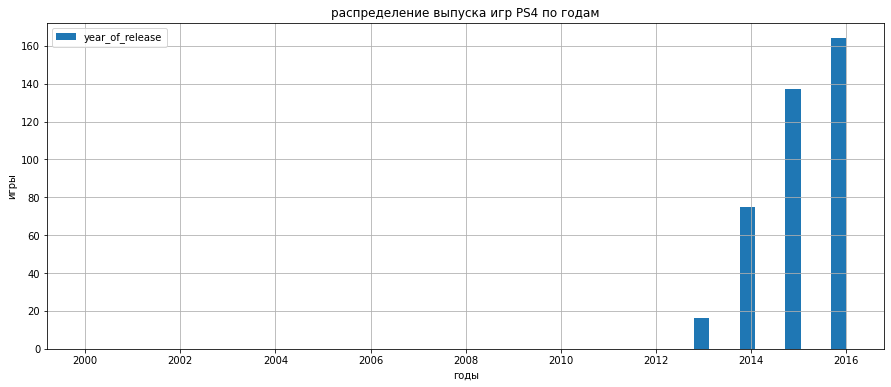

In [40]:
data_year_2000.query('platform == "PS4"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PS4 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

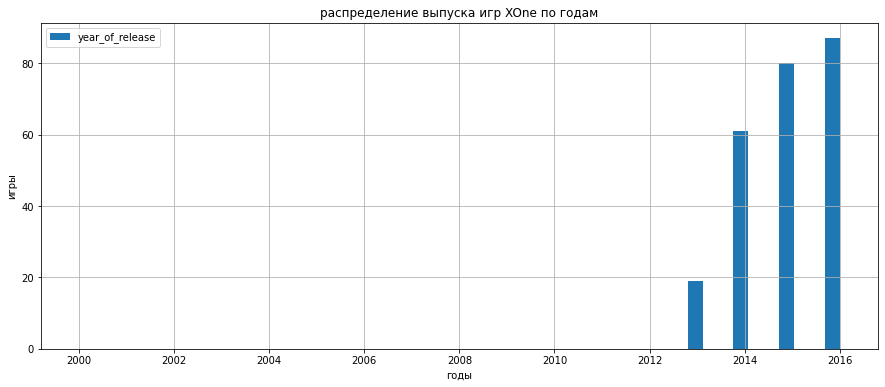

In [41]:
data_year_2000.query('platform == "XOne"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр XOne по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

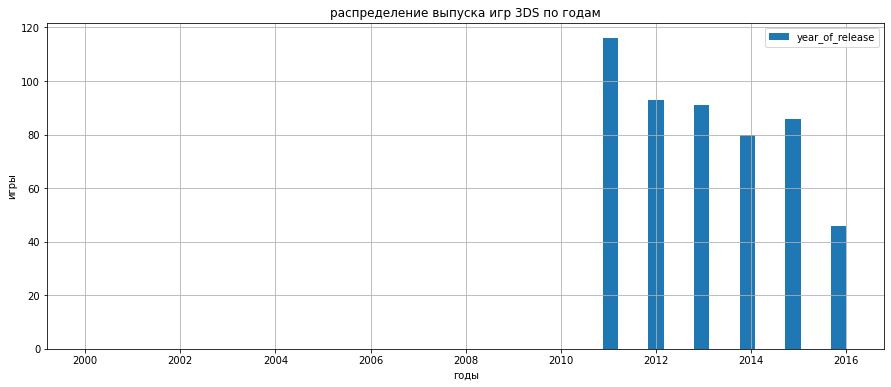

In [42]:
data_year_2000.query('platform == "3DS"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр 3DS по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

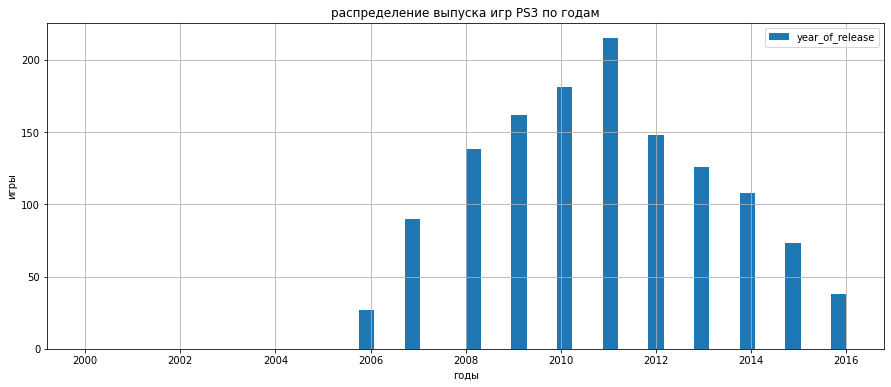

In [43]:
data_year_2000.query('platform == "PS3"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PS3 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

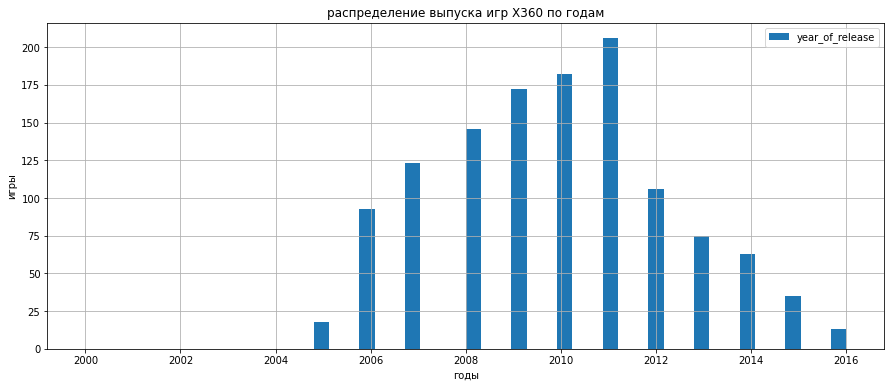

In [44]:
data_year_2000.query('platform == "X360"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр X360 по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

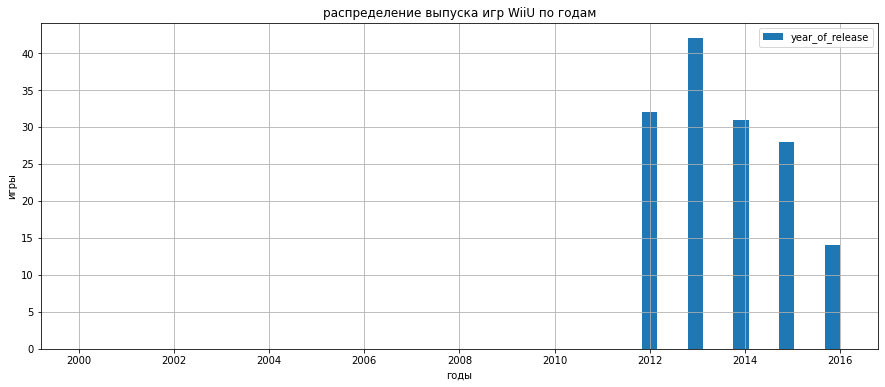

In [45]:
data_year_2000.query('platform == "WiiU"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр WiiU по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

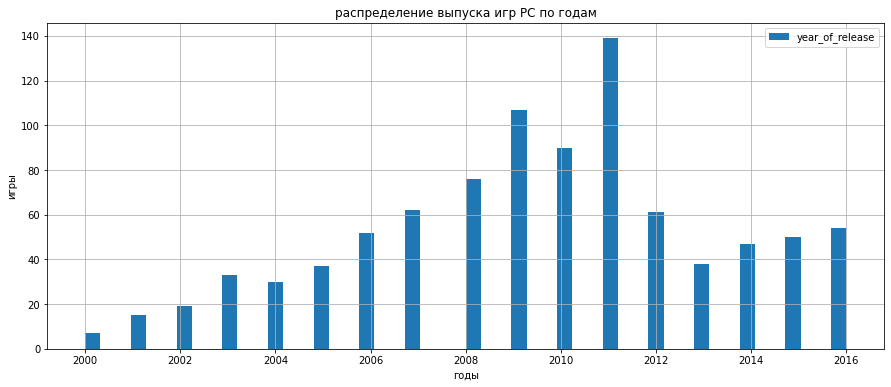

In [46]:
data_year_2000.query('platform == "PC"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PC по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

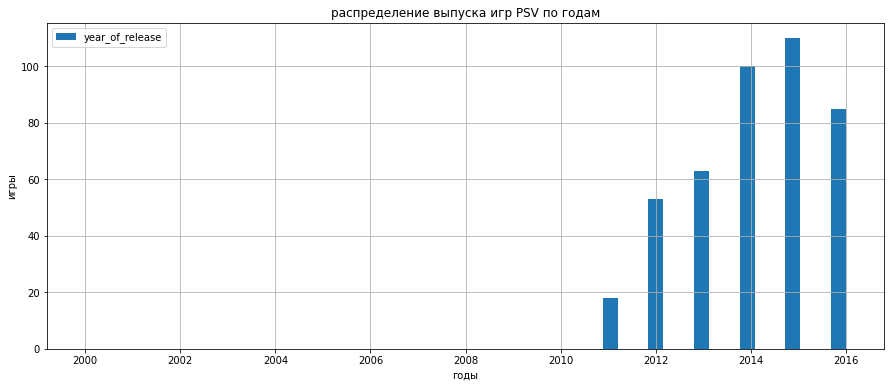

In [47]:
data_year_2000.query('platform == "PSV"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PSV по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

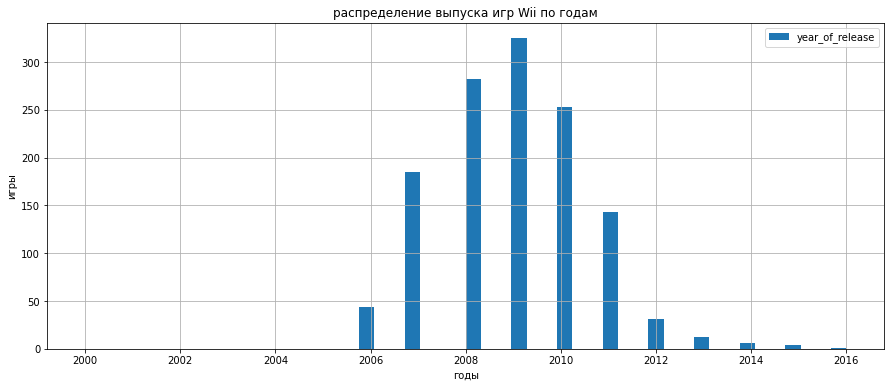

In [48]:
data_year_2000.query('platform == "Wii"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр Wii по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

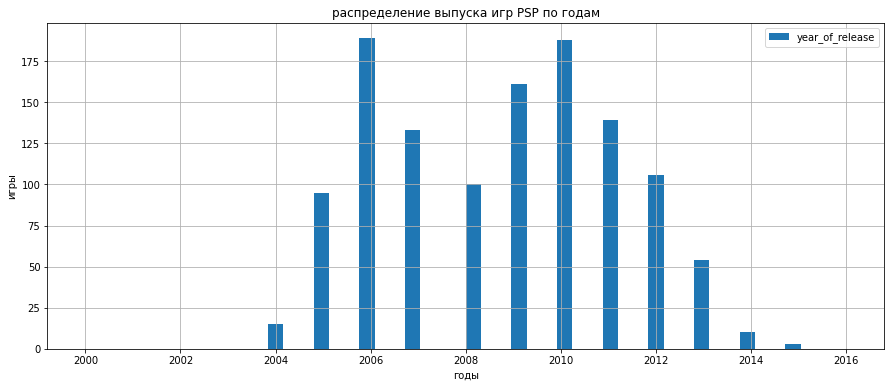

In [49]:
data_year_2000.query('platform == "PSP"')['year_of_release'].hist(bins = 50, figsize = (15,6), range = (2000, 2016), legend=True);
plt.title('распределение выпуска игр PSP по годам')
plt.xlabel('годы')
plt.ylabel('игры')
plt.show()
#построим гисторамму методом hist()

Выводы: 
- наиболее актуальными с точки зрения суммарных объёмов продаж и выпуска новых игр являются платформы PS4 и XOne; 
- следующие за ними по суммарным объёмам продаж платформы 3DS, PS3, X360, WiiU показывают отрицательную динамику по количеству выпускаемых игр, а судя по количеству лет на рынке (кроме WiiU) находятся на закате жизненного цикла;
- платформа РС начиная с 2014 года показывает положительную динамику по объёмам продаж, что требует дополнительно анализа;
- платформа PSV прошла пик по количеству игр в 2015 году и может рассматриваться как актуальная на данный момент;
- платформы Wii и PSP практически не выпускают новых игр, показывают минимальный объём суммарных продаж и прошли свой жизненный цикл.


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [50]:
data_global_sales = data.query('year_of_release >= 2014')
#сделаем срез по играм с выпуском с 2014 года
data_global_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


Text(0, 0.5, 'млн.проданных копий игр')

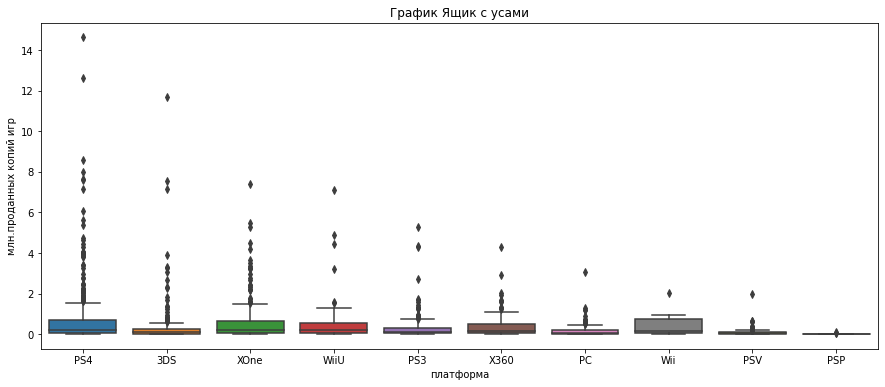

In [51]:
plt.figure(figsize=(15,6));
sns.boxplot(data=data_global_sales, x='platform', y='total_sales')
plt.title('График Ящик с усами')
plt.xlabel('платформа')
plt.ylabel('млн.проданных копий игр')

На графике видно что выбросы начинаются после total_sales равным чуть больше 1 млн., уберем выбросы:

In [52]:
data_global_sales = data_global_sales.query('total_sales <= 1.25')

Text(0, 0.5, 'млн.проданных копий игр')

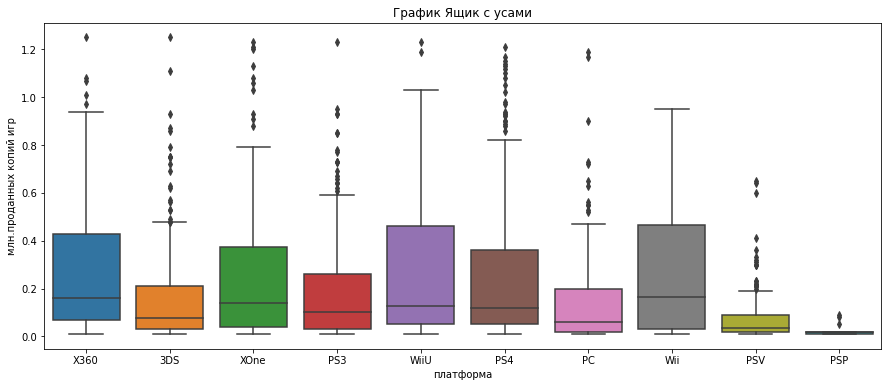

In [53]:
plt.figure(figsize=(15,6));
sns.boxplot(data=data_global_sales, x='platform', y='total_sales')
plt.title('График Ящик с усами')
plt.xlabel('платформа')
plt.ylabel('млн.проданных копий игр')

Выводы по глобальным продажам с 2014 года по количеству проданных копий игр:
- глобальные продажи больше всех у платформ WiiU, Wii, и X360;
- глобальные продажи на среднем уровне у платформ PS4, XOne и PS3;
- глобальные продажи ниже среднего у 3DS, PC, PSV и PSP.

#### Изучим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Создадим переменные для всех типов платформ:

In [54]:
data_X360 = data_global_sales.query('platform == "X360"')
data_3DS = data_global_sales.query('platform == "3DS"')
data_XOne = data_global_sales.query('platform == "XOne"')
data_PS3 = data_global_sales.query('platform == "PS3"')
data_WiiU = data_global_sales.query('platform == "WiiU"')
data_PS4 = data_global_sales.query('platform == "PS4"')
data_PC = data_global_sales.query('platform == "PC"')
data_Wii = data_global_sales.query('platform == "Wii"')
data_PSV = data_global_sales.query('platform == "PSV"')
data_PSP = data_global_sales.query('platform == "PSP"')

Изучим влияние продаж игр платформы X360 от отзывов критиков:

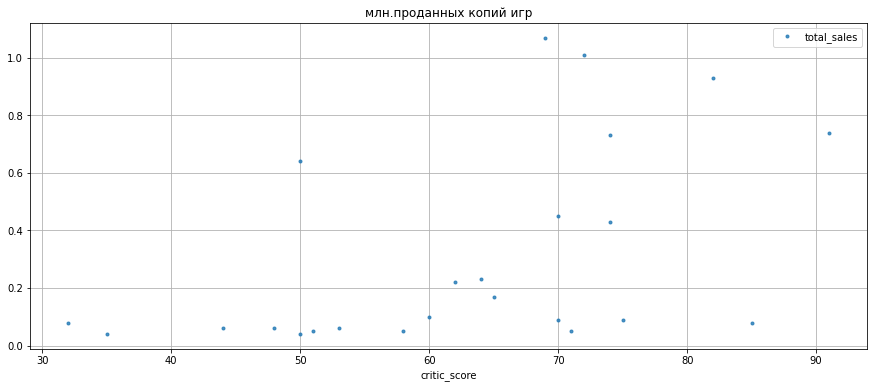

In [55]:
data_X360.plot(x='critic_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()


Расчитаем коэффицент корреляции продаж игр платформы X360 от отзывов критиков:

In [56]:
print('Коэффициент корреляции количества продаж игр платформы X360 от отзывов критиков:', round(data_X360['critic_score'].corr(data_X360['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы X360 от отзывов критиков: 0.5


Изучим влияние продаж игр платформы X360 от отзывов пользователей:

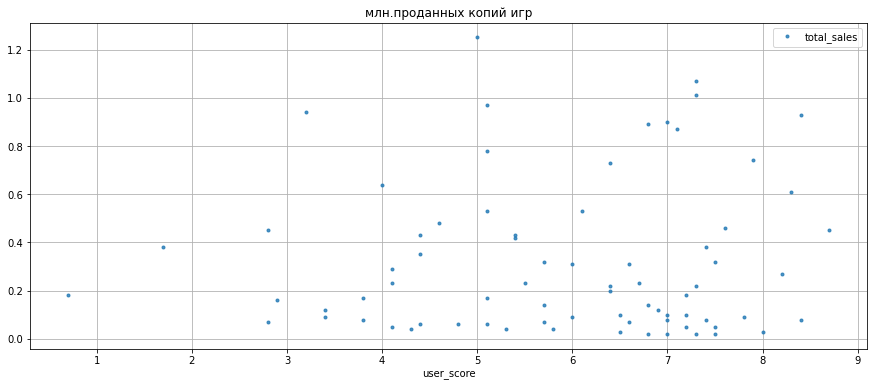

In [57]:
data_X360.plot(x='user_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы X360 от отзывов пользователей:

In [58]:
print('Коэффициент корреляции количества продаж игр платформы X360 от отзывов пользователей:', round(data_X360['user_score'].corr(data_X360['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы X360 от отзывов пользователей: 0.06


Изучим влияние продаж игр платформы 3DS от отзывов критиков:

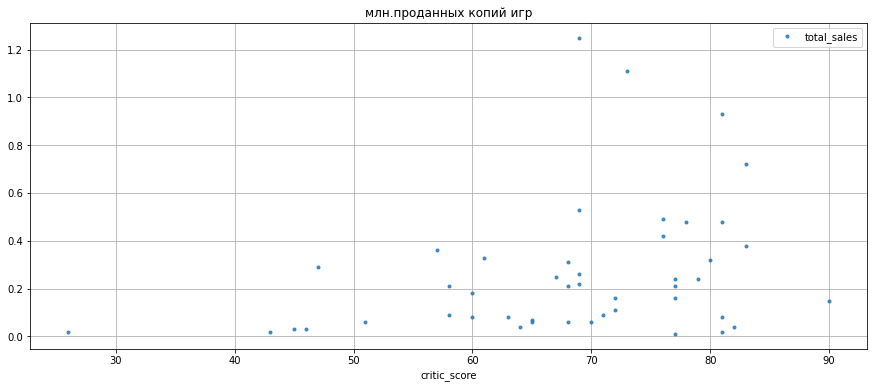

In [59]:
data_3DS.plot(x='critic_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы 3DS от отзывов критиков:

In [60]:
print('Коэффициент корреляции количества продаж игр платформы 3DS от отзывов критиков:', round(data_3DS['critic_score'].corr(data_3DS['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы 3DS от отзывов критиков: 0.31


Изучим влияние продаж игр платформы 3DS от отзывов пользователей:

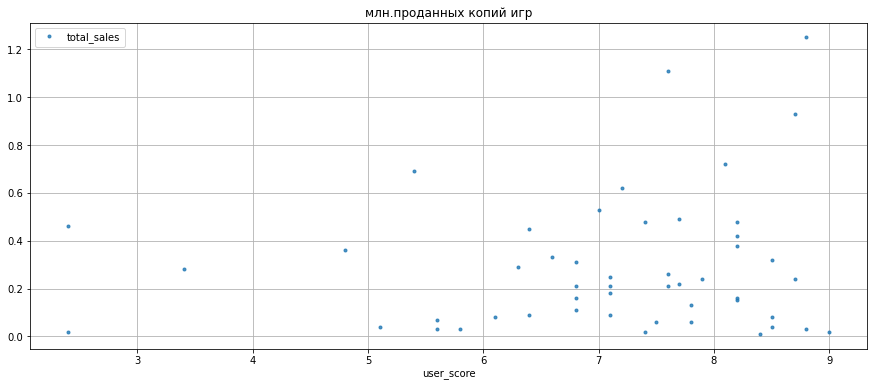

In [61]:
data_3DS.plot(x='user_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы 3DS от отзывов пользователей:

In [62]:
print('Коэффициент корреляции количества продаж игр платформы 3DS от отзывов пользователей:', round(data_3DS['user_score'].corr(data_3DS['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы 3DS от отзывов пользователей: 0.14


Изучим влияние продаж игр платформы XOne от отзывов критиков:

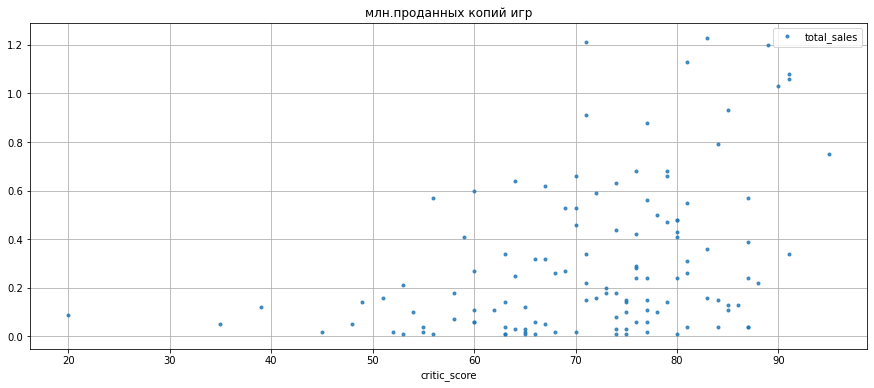

In [63]:
data_XOne.plot(x='critic_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы XOne от отзывов критиков:

In [64]:
print('Коэффициент корреляции количества продаж игр платформы XOne от отзывов критиков:', round(data_XOne['critic_score'].corr(data_XOne['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы XOne от отзывов критиков: 0.4


Изучим влияние продаж игр платформы XOne от отзывов пользователей:

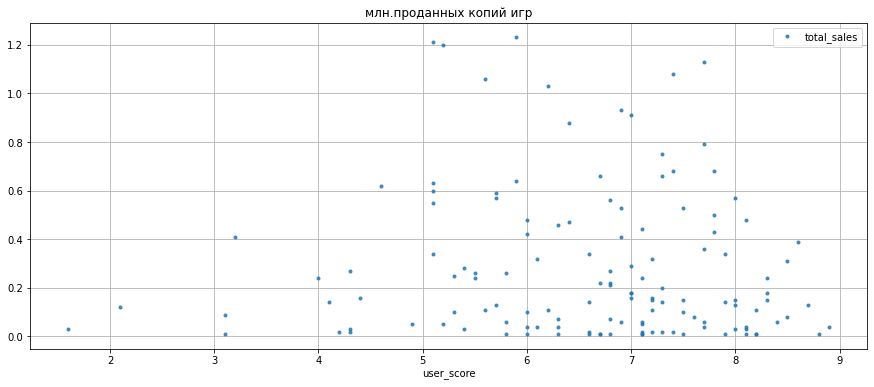

In [65]:
data_XOne.plot(x='user_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы XOne от отзывов пользователей:

In [66]:
print('Коэффициент корреляции количества продаж игр платформы XOne от отзывов пользователей:', round(data_XOne['user_score'].corr(data_XOne['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы XOne от отзывов пользователей: -0.05


Изучим влияние продаж игр платформы PS3 от отзывов критиков:

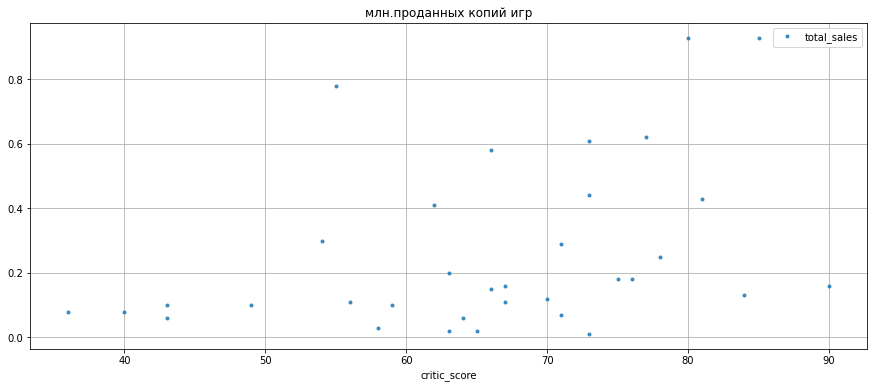

In [67]:
data_PS3.plot(x='critic_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы PS3 от отзывов критиков:

In [68]:
print('Коэффициент корреляции количества продаж игр платформы PS3 от отзывов критиков:', round(data_PS3['critic_score'].corr(data_PS3['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы PS3 от отзывов критиков: 0.38


Изучим влияние продаж игр платформы PS3 от отзывов пользователей:

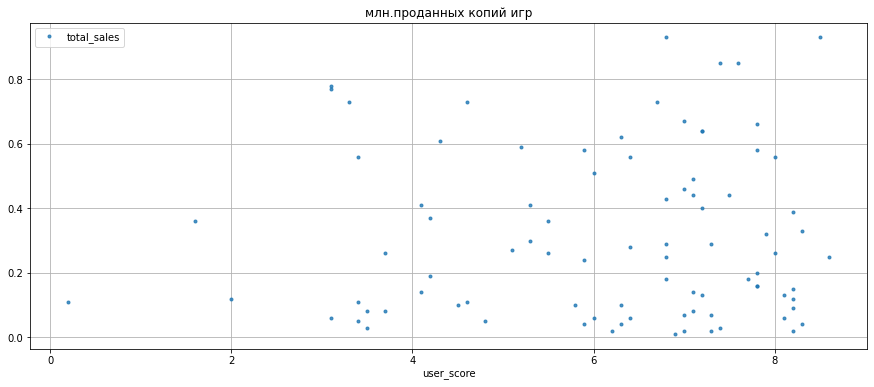

In [69]:
data_PS3.plot(x='user_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы PS3 от отзывов пользователей:

In [70]:
print('Коэффициент корреляции количества продаж игр платформы PS3 от отзывов пользователей:', round(data_PS3['user_score'].corr(data_PS3['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы PS3 от отзывов пользователей: 0.03


Изучим влияние продаж игр платформы WiiU от отзывов критиков:

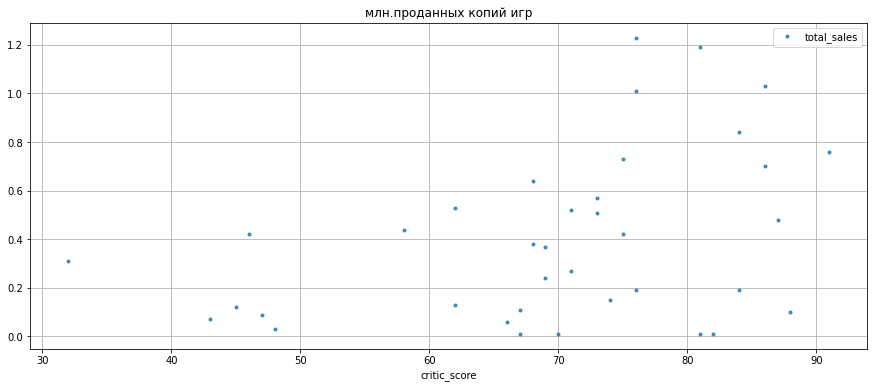

In [71]:
data_WiiU.plot(x='critic_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы WiiU от отзывов критиков:

In [72]:
print('Коэффициент корреляции количества продаж игр платформы WiiU от отзывов критиков:', round(data_WiiU['critic_score'].corr(data_WiiU['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы WiiU от отзывов критиков: 0.39


Изучим влияние продаж игр платформы WiiU от отзывов пользователей:

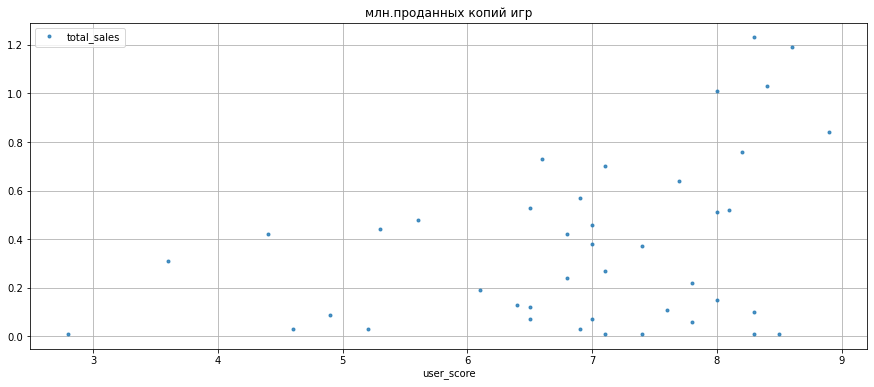

In [73]:
data_WiiU.plot(x='user_score', y='total_sales', style='.', title='млн.проданных копий игр',figsize=(15, 6), alpha=0.8, grid=True, sharex=False)
plt.show()

Расчитаем коэффицент корреляции продаж игр платформы WiiU от отзывов пользователей:

In [74]:
print('Коэффициент корреляции количества продаж игр платформы WiiU от отзывов пользователей:', round(data_WiiU['user_score'].corr(data_WiiU['total_sales']), 2))

Коэффициент корреляции количества продаж игр платформы WiiU от отзывов пользователей: 0.37


Вывод:
- по изученным данным и расчитанным коэффициентам корреляции по первым 5 платформам можно сделать вывод о том что существет умеренная зависимость между между отзывами критиков и продажами игр, при этом зависимость между отзывами пользователей и продажами игр очень слабая или отсутсвует.

#### Изучим общее распределение игр по жанрам. Сделаем выводы о самых прибыльных жанрах и о жанрах с высокими и низкими продажами.

С помощью сводной таблицы отсортируем данные по жанрам в разрезе продаж:

In [75]:
game_genre = data_global_sales.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False)
game_genre = game_genre.reset_index().rename_axis(None, axis=1)
game_genre
#выведем данные с помощью содной табл pivot_table()

,genre,total_sales
0,Action,106.69
1,Role-Playing,42.03
2,Sports,37.77
3,Shooter,32.69
4,Misc,19.65
5,Adventure,14.51
6,Fighting,11.64
7,Racing,11.02
8,Simulation,7.03
9,Platform,5.39


Text(0, 0.5, 'млн.проданных копий игр')

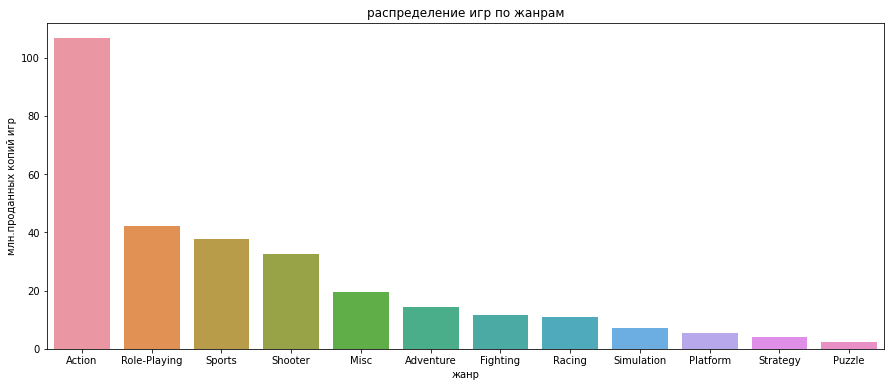

In [76]:
plt.figure(figsize=(15,6));
sns.barplot(data=game_genre, x='genre', y='total_sales')
plt.title('распределение игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('млн.проданных копий игр')
#методом sns.barplot() построим диаграмму распределения

Построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам:

Text(0, 0.5, 'млн.проданных копий игр')

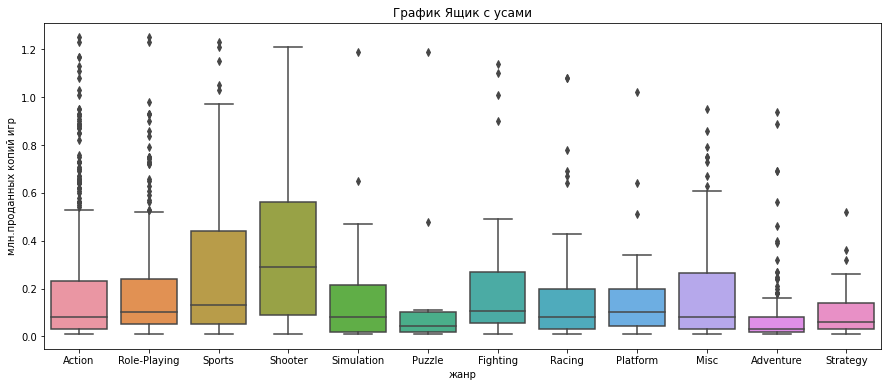

In [77]:
plt.figure(figsize=(15,6));
sns.boxplot(data=data_global_sales, x='genre', y='total_sales')
plt.title('График Ящик с усами')
plt.xlabel('жанр')
plt.ylabel('млн.проданных копий игр')

Выводы: 
- наиболее прибыльными жанрами игр с 2014 года являются: Shooter, Sports, Misc и Fighting;
- жанрами со средней прибылью: Action, Role-Playing, Simulation, Racing и Platform;
- жанры с наименьшей прибылью: Adventure, Puzzle и Strategy;
- по общим продажам лидируют жанры: Action, Role-Playing, Sport и Shooter.

### Составим портрет пользователя каждого региона  (NA, EU, JP), определив:
- Самые популярные платформы (топ-5). Опишем различия
- Самые популярные жанры (топ-5). Поясним разницу.
- Определим влияние рейтинга ESRB на продажи в отдельном регионе.

#### Изучим самые популярные платформы (топ-5) пользователей каждого региона (NA, EU, JP)

Выведем информацию по ТОП - 5 популярным платформам для каждого региона:

In [78]:
data_na_pf = data_global_sales.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
data_na_top5_pf = data_na_pf.head(5)
data_na_top5_pf['other'] = data_na_pf[5 :].sum()

data_eu_pf = data_global_sales.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
data_eu_top5_pf = data_eu_pf.head(5)
data_eu_top5_pf['other'] = data_eu_pf[5 :].sum()

data_jp_pf = data_global_sales.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
data_jp_top5_pf = data_jp_pf.head(5)
data_jp_top5_pf['other'] = data_jp_pf[5 :].sum()
#методом groupby() производим группировку данных по платформе и продажам в каждом регионе
#методом head() получаем информацию о ТОП-5 платформ по продажам в регионе 
#добавляем строку с суммарными продажами по другим платформам в данном регионе 

Построим круговые диаграммы по самым популярным платформам (топ-5) пользователей для каждого региона (NA, EU, JP)

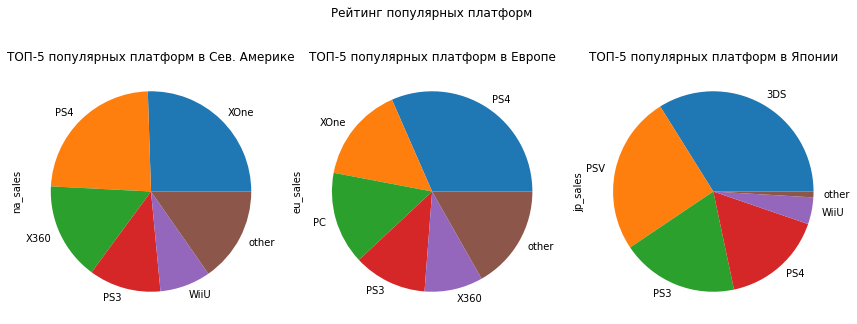

In [79]:
fig, axes = plt.subplots(1, 3, figsize = (12,5))
data_na_top5_pf.plot(y = 'platform', kind='pie', ax=axes[0]);
data_eu_top5_pf.plot(y = 'platform', kind='pie', ax=axes[1]);
data_jp_top5_pf.plot(y = 'platform', kind='pie', ax=axes[2]);
fig.suptitle('Рейтинг популярных платформ')
axes[0].set_title('ТОП-5 популярных платформ в Сев. Америке')
axes[1].set_title('ТОП-5 популярных платформ в Европе')
axes[2].set_title('ТОП-5 популярных платформ в Японии')
plt.tight_layout()
plt.show()
#cоздаём фигуру, содержащую 3 подграфика, расположенных в ряд
#назначаем подграфики по отдельности трем командам круговой диаграммы
#для построения диаграмм применяем метод plot()

Основной вывод: популярность платформ сильно отличается в зависимости от региона использования, так с 2014 года:
- в Северной Америке (NA), наиболее популярными являются платформы XOne (27.44 млн. проданных копий) и PS4 (25.67 млн.), далее идут X360 (17.04 млн.), PS3 (12.59), WiiU (8.88 млн.), на другие платформы приходится 16.59 млн. проданных копий;
- в Европе (EU), наиболее популярными являются платформы PS4 (32.7 млн. проданных копий) и XOne (15.99 млн.), далее идут PC (15.48 млн.), PS3 (12.25), X360 (8.88 млн.), на другие платформы приходится 17.38 млн. проданных копий игр;
- в Японии (JP), наиболее популярными являются платформы 3DS (18.10 млн. проданных копий) и PSV (13.64 млн.), далее идут PS3 (10.09 млн.), PS4 (8.77), WiiU (2.31 млн.), на другие платформы приходится 0,5 млн. проданных копий игр.

#### Изучим самые популярные жанры (топ-5) пользователей каждого региона (NA, EU, JP)

Выведем информацию по ТОП - 5 популярным жанрам для каждого региона:

In [80]:
data_na_ge = data_global_sales.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False)
data_na_top5_ge = data_na_ge.head(5)
data_na_top5_ge['other'] = data_na_ge[5 :].sum()

data_eu_ge = data_global_sales.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False)
data_eu_top5_ge = data_eu_ge.head(5)
data_eu_top5_ge['other'] = data_eu_ge[5 :].sum()

data_jp_ge = data_global_sales.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False)
data_jp_top5_ge = data_jp_ge.head(5)
data_jp_top5_ge['other'] = data_jp_ge[5 :].sum()
#методом groupby() производим группировку данных по жанрам и продажам в каждом регионе
#методом head() получаем информацию о ТОП-5 жанрах по продажам в регионе 
#добавляем строку с суммарными продажами по другим жанрам в данном регионе 

Построим круговые диаграммы по самым популярным жанрам (топ-5) пользователей для каждого региона (NA, EU, JP)

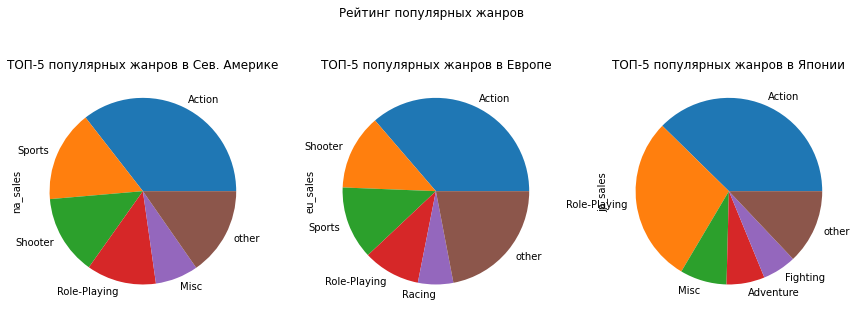

In [81]:
fig, axes = plt.subplots(1, 3, figsize = (12,5))
data_na_top5_ge.plot(y = 'platform', kind='pie', ax=axes[0]);
data_eu_top5_ge.plot(y = 'platform', kind='pie', ax=axes[1]);
data_jp_top5_ge.plot(y = 'platform', kind='pie', ax=axes[2]);
fig.suptitle('Рейтинг популярных жанров')
axes[0].set_title('ТОП-5 популярных жанров в Сев. Америке')
axes[1].set_title('ТОП-5 популярных жанров в Европе')
axes[2].set_title('ТОП-5 популярных жанров в Японии')
plt.tight_layout()
plt.show()
#cоздаём фигуру, содержащую 3 подграфика, расположенных в ряд
#назначаем подграфики по отдельности трем командам круговой диаграммы
#для построения диаграмм применяем метод plot()

Основной вывод: предпочтения по жанрам игр очень похожие между пользователями в Северной Америке и Европе, и отличаются от предпочтений пользователей Японии, так с 2014 года ТОП-5 жанров игр распределились следующим образом:
- в Северной Америке (NA), Европе (EU) и Японии (JP) самым популярным является жанр Action;
- на втором месте идут жанры Sport (для NA), Shooter (для EU) и Role-Playing (для JP);
- на третьем месте идут жанры Shooter (для NA), Sport (для EU) и Misc (для JP);
- на четвертом месте идут жанры Role-Playing (для NA и EU) и Adventure (для JP);
- на пятом месте идут жанры Misc (для NA), Racing (для EU) и Fighting (для JP).

#### Определим влияние рейтинга ESRB на продажи в отдельном регионе.

Выведем информацию по возрастной категории и продажам для каждого региона:

In [82]:
data_na_rating = data_global_sales.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)
data_eu_rating = data_global_sales.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)
data_jp_rating = data_global_sales.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)
#методом groupby() производим группировку данных по  рейтинга ESRB и продажам в каждом регионе


Построим круговые диаграммы по самым популярным возрастным категориям пользователей для каждого региона (NA, EU, JP)

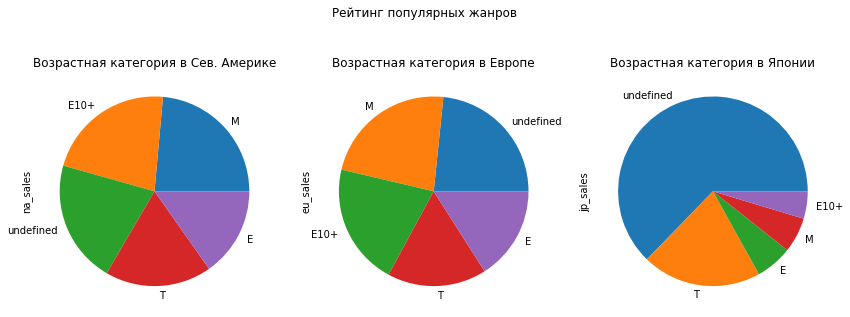

In [83]:
fig, axes = plt.subplots(1, 3, figsize = (12,5))
data_na_rating.plot(y = 'platform', kind='pie', ax=axes[0]);
data_eu_rating.plot(y = 'platform', kind='pie', ax=axes[1]);
data_jp_rating.plot(y = 'platform', kind='pie', ax=axes[2]);
fig.suptitle('Рейтинг популярных жанров')
axes[0].set_title('Возрастная категория в Сев. Америке')
axes[1].set_title('Возрастная категория в Европе')
axes[2].set_title('Возрастная категория в Японии')
plt.tight_layout()
plt.show()
#cоздаём фигуру, содержащую 3 подграфика, расположенных в ряд
#назначаем подграфики по отдельности трем командам круговой диаграммы
#для построения диаграмм применяем метод plot()

In [84]:
data_na_rating_df = pd.DataFrame([data_na_rating])
data_eu_rating_df = pd.DataFrame([data_eu_rating])
data_jp_rating_df = pd.DataFrame([data_jp_rating])
display(data_na_rating_df)
display(data_eu_rating_df)
display(data_jp_rating_df)

rating,M,E10+,undefined,T,E
na_sales,25.56,23.92,22.73,19.7,16.52


rating,undefined,M,E10+,T,E
eu_sales,24.2,23.78,21.52,17.52,16.55


rating,undefined,T,E,M,E10+
jp_sales,33.51,10.86,3.35,3.2,2.49


In [85]:
print('Рейтинговые обозначения:')
print('M (Mature) — «Для взрослых»')
print('E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»')
print('«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет')
print('«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет)')


Рейтинговые обозначения:
M (Mature) — «Для взрослых»
E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет)


Выводы:
- в регионе Северная Америка (NA) наибольшее количество игр категории M (25.56 млн. копий игр) и E10+ (23.92 млн.), далее идут Т (19.7 млн.) и Е (16.52 млн.) категории, при этом почти в 23% случаев категория игр не определена;
- в регионе Европа (EU) наиболшее количество игр категории М (23.78 млн. копий игр) и E10+ (21.52 млн.), далее идут категории Т (17.52 млн.) и Е (16.55 млн.), при этом в 24% случаев категория игр не определена;
- в регионе Японяи (JP) наиболшее количество игр категории Т (10.86 млн. копий игр) и E (3.35 млн.), далее идут категории М (3.2 млн.) и Е10+ (2.49 млн.), при этом почти в 34% случаев категория игр не определена, соответсвенно данные по возрастному рейтингу в регионе Япония являются наименее полными среди исследуемых регионов и не подходят для сопостовления с регионами (NA) и (EU).
    

### Общий вывод по проекту 

#### Выводы по предобработке данных:


- получены исходные данные для исследования, постороены гистограммы;
- изменены заглавные буквы на строчные в названиях столбцов;
- в столбцах year_of_release, name и genre удалено не критичное количество пропусков (менее 2 % от всех данных);
- пропуски значений в стобце 'rating' заменены на 'undefined';
- значение 'tbd' в столбце user_score заменено на 'NaN';
- в таблице нет явных дубликатов и есть один неявный дубликат, влияния дубликатов на аналитику в данном DataFrame нет;
- устранение анамалий на данном этапе решено не проводить, возможно выбросы нужно будет удалить в дальнейшем.

#### Выводы по исследовательскому анализу данных:

- Выводы по количеству выпускаемых игр:
    - за 20 лет с 1980 по 2000 год было выпущено всего 1974 игр, при этом за следующие 16 лет с 2000 по 2016 год было выпущено более чем в 7 раз больше игр - 14470 игр;
    - объём выпускаемых платформенных игр начал активный рост с 1993 года и продолжил в 2001 году, пик роста пришёлся на 2008-2009 годы, после чего начался спад в объёмах выпускаемых игр для платформ;
    - можно предположить, что спад в объёме выпускаемых платформенных игр пришёлся на активный рост объёма в выпуске игр для мобильных устройств и использования данных устройств в том числе для игр;
    - всего представлен временной период с 1980 по 2016 год. 
    


- ТОП - 10 платформ начиная с 2014 года по суммарным продажам являются PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV, Wii, PSP 

- выводы по суммарным продажам по платформам:
    - наиболее актуальными с точки зрения суммарных объёмов продаж и выпуска новых игр являются платформы PS4 и XOne;
    - следующие за ними по суммарным объёмам продаж платформы 3DS, PS3, X360, WiiU показывают отрицательную динамику по количеству выпускаемых игр, а судя по количеству лет на рынке (кроме WiiU) находятся на закате жизненного цикла;
    - платформа РС начиная с 2014 года показывает положительную динамику по объёмам продаж, что требует дополнительно анализа;
    - платформа PSV прошла пик по количеству игр в 2015 году и может рассматриваться как актуальная на данный момент;
    - платформы Wii и PSP практически не выпускают новых игр, показывают минимальный объём суммарных продаж и прошли свой жизненный цикл.
    

- выводы по глобальным продажам с 2014 года по количеству проданных копий игр:
    - глобальные продажи больше всех у платформ WiiU, Wii, и X360;
    - глобальные продажи на среднем уровне у платформ PS4, XOne и PS3;
    - глобальные продажи ниже среднего у 3DS, PC, PSV и PSP.


- по изученным данным и расчитанным коэффициентам корреляции по первым 5 платформам можно сделать вывод о том что существет умеренная зависимость между между отзывами критиков и продажами игр, при этом зависимость между отзывами пользователей и продажами игр очень слабая или отсутсвует;


- выводы по прибыльности жанров:
    - наиболее прибыльными жанрами игр с 2014 года являются: Shooter, Sports, Misc и Fighting;
    - жанрами со средней прибылью: Action, Role-Playing, Simulation, Racing и Platform;
    - жанры с наименьшей прибылью: Adventure, Puzzle и Strategy;
    - по общим продажам лидируют жанры: Action, Role-Playing, Sport и Shooter.

#### Выводы по портрету пользователя каждого региона (NA, EU, JP):

- популярность платформ сильно отличается в зависимости от региона использования, так с 2014 года:
    - в Северной Америке (NA), наиболее популярными являются платформы XOne (27.44 млн. проданных копий) и PS4 (25.67 млн.), далее идут X360 (17.04 млн.), PS3 (12.59), WiiU (8.88 млн.), на другие платформы приходится 16.59 млн. проданных копий;
    - в Европе (EU), наиболее популярными являются платформы PS4 (32.7 млн. проданных копий) и XOne (15.99 млн.), далее идут PC (15.48 млн.), PS3 (12.25), X360 (8.88 млн.), на другие платформы приходится 17.38 млн. проданных копий игр;
    - в Японии (JP), наиболее популярными являются платформы 3DS (18.10 млн. проданных копий) и PSV (13.64 млн.), далее идут PS3 (10.09 млн.), PS4 (8.77), WiiU (2.31 млн.), на другие платформы приходится 0,5 млн. проданных копий игр.


- предпочтения по жанрам игр очень похожие между пользователями в Северной Америке и Европе, и отличаются от предпочтений пользователей Японии, так с 2014 года ТОП-5 жанров игр распределились следующим образом:
    - в Северной Америке (NA), Европе (EU) и Японии (JP) самым популярным является жанр Action;
    - на втором месте идут жанры Sport (для NA), Shooter (для EU) и Role-Playing (для JP);
    - на третьем месте идут жанры Shooter (для NA), Sport (для EU) и Misc (для JP);
    - на четвертом месте идут жанры Role-Playing (для NA и EU) и Adventure (для JP);
    - на пятом месте идут жанры Misc (для NA), Racing (для EU) и Fighting (для JP).


- выводы по рейтингу ESRB (категория возрастных групп):
    - в регионе Северная Америка (NA) наибольшее количество игр категории M (25.56 млн. копий игр) и E10+ (23.92 млн.), далее идут Т (19.7 млн.) и Е (16.52 млн.) категории, при этом почти в 23% случаев категория игр не определена;
    - в регионе Европа (EU) наиболшее количество игр категории М (23.78 млн. копий игр) и E10+ (21.52 млн.), далее идут категории Т (17.52 млн.) и Е (16.55 млн.), при этом в 24% случаев категория игр не определена;
    - в регионе Японяи (JP) наиболшее количество игр категории Т (10.86 млн. копий игр) и E (3.35 млн.), далее идут категории М (3.2 млн.) и Е10+ (2.49 млн.), при этом почти в 34% случаев категория игр не определена, соответсвенно данные по возрастному рейтингу в регионе Япония являются наименее полными среди исследуемых регионов и не подходят для сопостовления с регионами (NA) и (EU).


- для справки, рейтинговые обозначения:
    - M (Mature) — «Для взрослых»
    - E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
    - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
    - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет)

### Выявленные закономерности, определяющие успешность игры:

- в целом пик популярности платформенных игр пройден;
- жизненный цикл платформы составляет примерно 10 лет, пик приходится на 4-6 лет, после чего популярность платформы постепенно теряется;
- существет умеренная зависимость между между отзывами критиков и продажами игр;
- популярность платформ сильно отличается в зависимости от региона использования;
- популярность по жанрам имеет схожие черты в регионах Северная Америка и Европа, несколько отличается в Японии.

### Рекомендации по итогу исследования:

Для планирования рекламных компаний для игр, рекомендуем обратить внимание на следующие критерии:
- перспективные платформы: PS4 (для EU), XOne (для NA) и 3DS (для JP);
- прибыльные жанры: Shooter (для NA и EU) , Sports (для NA и EU), Misc (для JP);
- при этом самым популярным является жанр Action для всех регионов (NA, EU и JP);


Рекомендуем по возможности увеличить количество оставляемых отзывов критиков на сайте интернет - магазина, как положительно влияющих на продажи.